# EDA - Connor

## Import Libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (20,3)
mpl.rcParams['agg.path.chunksize'] = 10000

In [118]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [152]:
import seaborn as sns

## Import Data

In [3]:
data = pd.read_csv('collisions_data.csv')

In [4]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [5]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [6]:
print(len(data['COLLISION_ID']), 'rows')

1806302 rows


## Data Prep

In [7]:
data['number_of_vehicles'] = data[data.columns[24:29]].count(axis=1)

In [8]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

In [9]:
data['crash_month_year'] = pd.to_datetime(data['CRASH DATE']).dt.to_period('M')
data['crash_year'] = pd.to_datetime(data['CRASH DATE']).dt.to_period('Y')

In [18]:
data['crash_hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour
data['crash_hour'] = data['crash_hour'].astype(int)

In [38]:
def get_time_of_day(hour_int):
    if (hour_int < 8):
        return 'early morning'
    elif (hour_int > 7 and hour_int < 12):
        return 'late morning'
    elif (hour_int >= 12 and hour_int < 19):
        return 'afternoon'
    elif (hour_int >= 20):
        return 'night'

In [39]:
data['crash_time_of_day'] = data['crash_hour'].apply(get_time_of_day)

In [167]:
data[data.columns[24:29]] = data[data.columns[24:29]].astype('str')

In [172]:
data['sedan_involved'] = (data[data.columns[24:29]].values == 'Sedan').any(1).astype(int)

## EDA

**Number of Persons Injured vs Number of Persons Killed**

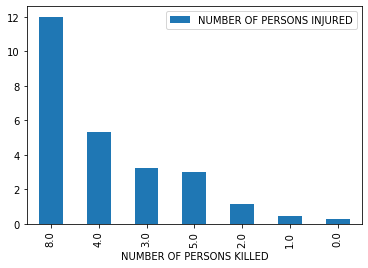

In [180]:
data[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].groupby(by=['NUMBER OF PERSONS KILLED'])\
.agg(mean).sort_values(by='NUMBER OF PERSONS INJURED', ascending = False).plot(kind='bar')

**Number of Persons Killed vs Number of Vehicles Involved**

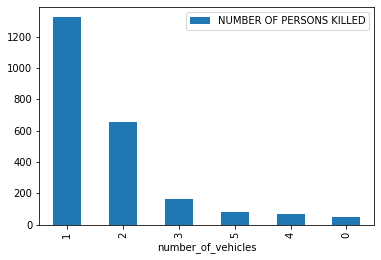

In [53]:
data[['NUMBER OF PERSONS KILLED', 'number_of_vehicles']].groupby(by=['number_of_vehicles'])\
.agg(sum).sort_values(by='NUMBER OF PERSONS KILLED', ascending = False).plot(kind='bar')

**Number of Persons Injured vs Number of Vehicles Involved**

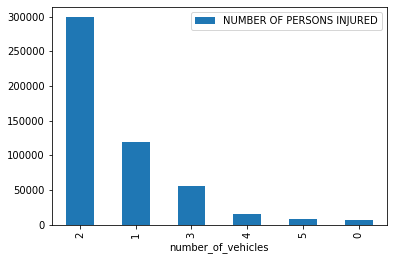

In [54]:
data[['NUMBER OF PERSONS INJURED', 'number_of_vehicles']].groupby(by=['number_of_vehicles'])\
.agg(sum).sort_values(by='NUMBER OF PERSONS INJURED', ascending = False).plot(kind='bar')

**Number of Persons Injured vs Number of Persons Killed Over Time**

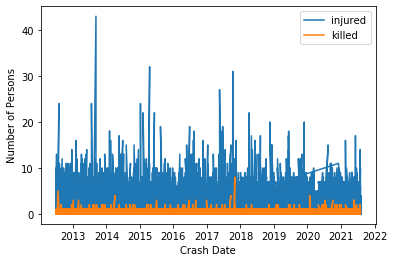

In [48]:
plot(data['CRASH DATE'], data['NUMBER OF PERSONS INJURED'], marker='None', linestyle='-', label='injured')
plot(data['CRASH DATE'], data['NUMBER OF PERSONS KILLED'], marker='None', linestyle='-', label='killed')
xlabel('Crash Date')
ylabel('Number of Persons')
legend(loc='best')

**Number of Persons Injured vs Number of Persons Killed**

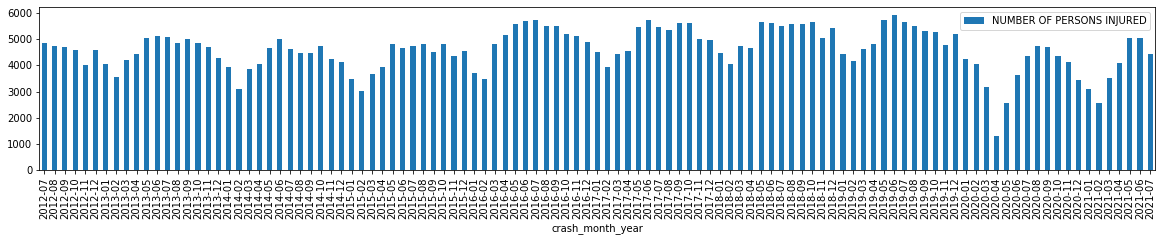

In [185]:
data[['NUMBER OF PERSONS INJURED', 'crash_month_year']]\
.groupby(by=['crash_month_year']).agg(sum).sort_values(by='crash_month_year').plot(kind='bar')

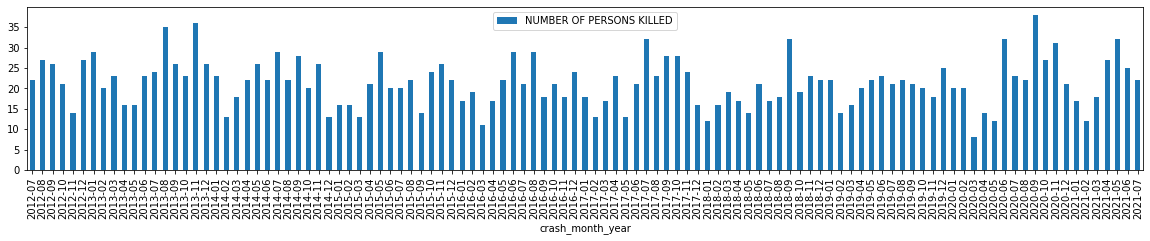

In [186]:
data[['NUMBER OF PERSONS KILLED', 'crash_month_year']]\
.groupby(by=['crash_month_year']).agg(sum).sort_values(by='crash_month_year').plot(kind='bar')

**Number of Persons Injured vs Number of Persons Killed Over Time (Hour of the Day)**

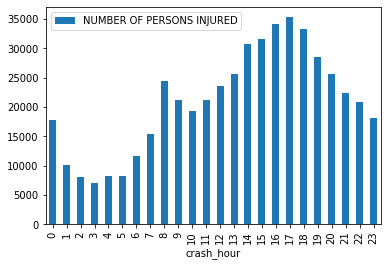

In [177]:
data[['NUMBER OF PERSONS INJURED', 'crash_hour']]\
.groupby(by=['crash_hour']).agg(sum).sort_values(by='crash_hour').plot(kind='bar')

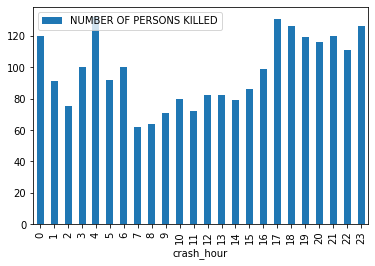

In [25]:
data[['NUMBER OF PERSONS KILLED', 'crash_hour']]\
.groupby(by=['crash_hour']).agg(sum).sort_values(by='crash_hour').plot(kind='bar')

**Number of Persons Injured vs Number of Persons Killed Over Time (Time of the Day)**

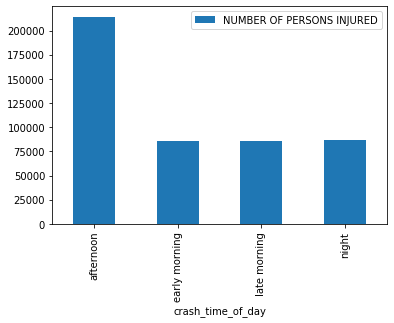

In [178]:
data[['NUMBER OF PERSONS INJURED', 'crash_time_of_day']]\
.groupby(by=['crash_time_of_day']).agg(sum).sort_values(by='crash_time_of_day').plot(kind='bar')

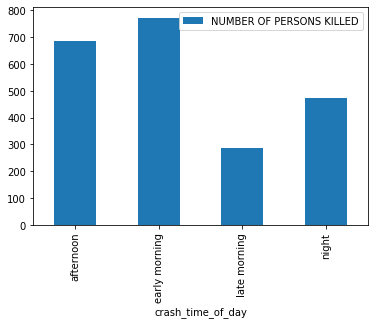

In [41]:
data[['NUMBER OF PERSONS KILLED', 'crash_time_of_day']]\
.groupby(by=['crash_time_of_day']).agg(sum).sort_values(by='crash_time_of_day').plot(kind='bar')

**Number of Persons Injured by Borough**

In [42]:
data[['NUMBER OF PERSONS INJURED', 'BOROUGH']].groupby(by=['BOROUGH']).agg(sum)

,NUMBER OF PERSONS INJURED
BOROUGH,
BRONX,53641.0
BROOKLYN,118505.0
MANHATTAN,53355.0
QUEENS,91340.0
STATEN ISLAND,13764.0


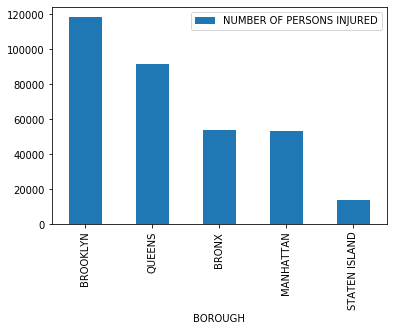

In [43]:
data[['NUMBER OF PERSONS INJURED', 'BOROUGH']].groupby(by=['BOROUGH']).agg(sum).sort_values(by='NUMBER OF PERSONS INJURED', ascending=False).plot(kind='bar')

**Number of Persons Killed by Borough**

In [44]:
data[['NUMBER OF PERSONS KILLED', 'BOROUGH']].groupby(by=['BOROUGH']).agg(sum)

,NUMBER OF PERSONS KILLED
BOROUGH,
BRONX,195.0
BROOKLYN,486.0
MANHATTAN,262.0
QUEENS,439.0
STATEN ISLAND,77.0


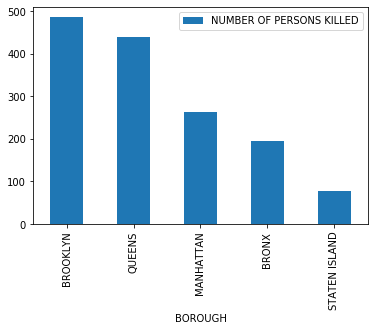

In [45]:
data[['NUMBER OF PERSONS KILLED', 'BOROUGH']].groupby(by=['BOROUGH']).agg(sum).sort_values(by='NUMBER OF PERSONS KILLED', ascending=False).plot(kind='bar')

**Vehicles Commonly Involved In a Crash Together**

In [57]:
vehicle_types = data[data.columns[24:30]]

In [59]:
mask = (vehicle_types['number_of_vehicles'] > 1)
vehicle_types = vehicle_types[mask]

In [63]:
vehicle_types2 = vehicle_types[vehicle_types.columns[0:2]]

In [77]:
vehicle_crosstab = pd.crosstab(vehicle_types2['VEHICLE TYPE CODE 1'], vehicle_types2['VEHICLE TYPE CODE 2'])

In [102]:
car_pairs = {}
for col in vehicle_crosstab:
    car_one = col
    car_two = vehicle_crosstab.loc[vehicle_crosstab[col] == vehicle_crosstab[col].max()][col].index.values[0]
    key = str(car_one) + ' & ' + str(car_two)
    value = vehicle_crosstab[col].max()
    car_pairs[key] = value

In [113]:
top_five = sorted(car_pairs.values(), reverse=True)[:5]

In [116]:
for k, v in sorted(car_pairs.items()):
    if (v in top_five):
        print(k, ', ', v)

PASSENGER VEHICLE & PASSENGER VEHICLE ,  193260
SPORT UTILITY / STATION WAGON & PASSENGER VEHICLE ,  63053
Sedan & Sedan ,  167229
Station Wagon/Sport Utility Vehicle & Station Wagon/Sport Utility Vehicle ,  114412
UNKNOWN & PASSENGER VEHICLE ,  49073


**Map Visualizations**

In [119]:
df = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [132]:
street_map = gpd.read_file('geo_export_afa33732-7fe9-4f22-86e6-d0eb138bfdf0.shp')

In [134]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

In [135]:
# designate coordinate system
crs = {'init':'EPSG:4326'}

In [136]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

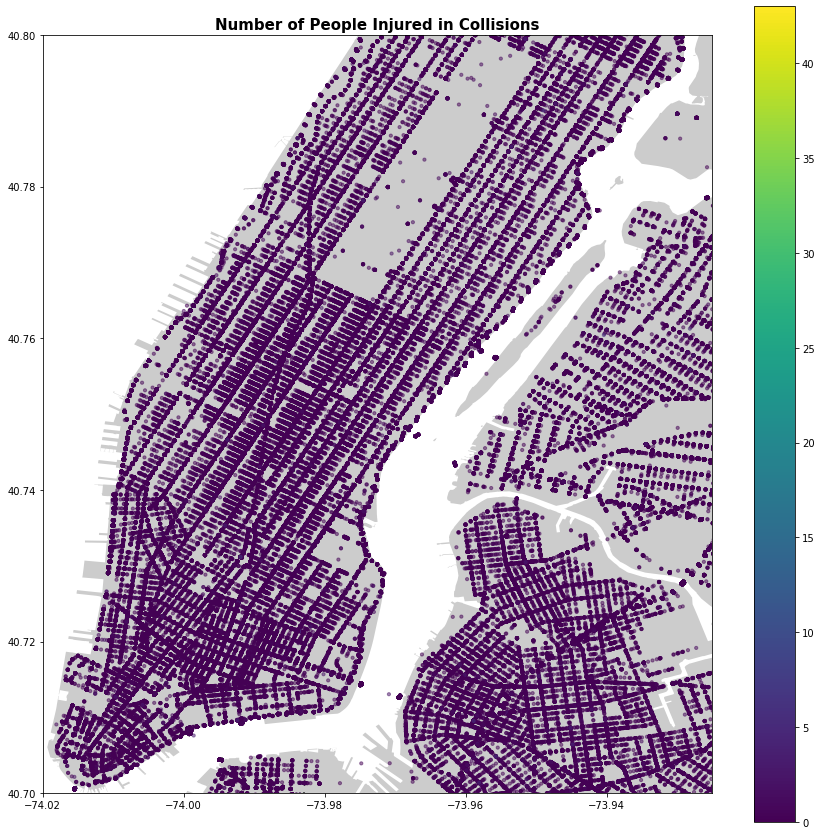

In [149]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='NUMBER OF PERSONS INJURED',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Number of People Injured in Collisions', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

**Number of Pedestrians Killed and Injured**

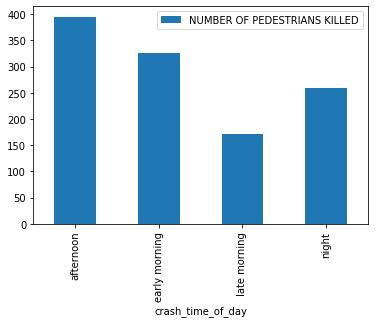

In [138]:
data[['NUMBER OF PEDESTRIANS KILLED', 'crash_time_of_day']]\
.groupby(by=['crash_time_of_day']).agg(sum).sort_values(by='crash_time_of_day').plot(kind='bar')

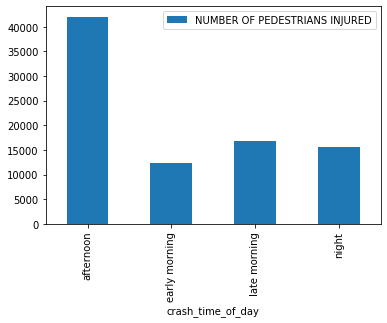

In [139]:
data[['NUMBER OF PEDESTRIANS INJURED', 'crash_time_of_day']]\
.groupby(by=['crash_time_of_day']).agg(sum).sort_values(by='crash_time_of_day').plot(kind='bar')

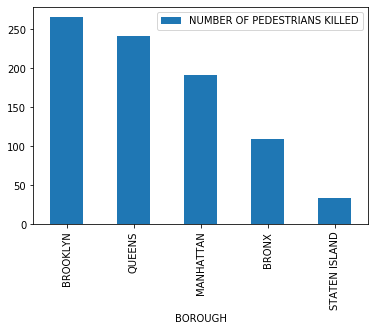

In [143]:
data[['NUMBER OF PEDESTRIANS KILLED', 'BOROUGH']].groupby(by=['BOROUGH'])\
.agg(sum).sort_values(by='NUMBER OF PEDESTRIANS KILLED', ascending=False).plot(kind='bar')

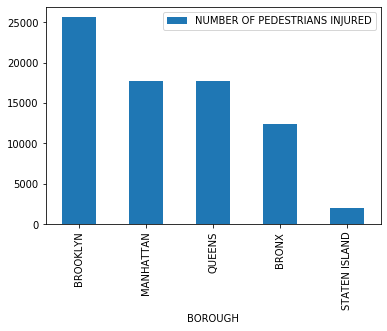

In [144]:
data[['NUMBER OF PEDESTRIANS INJURED', 'BOROUGH']].groupby(by=['BOROUGH'])\
.agg(sum).sort_values(by='NUMBER OF PEDESTRIANS INJURED', ascending=False).plot(kind='bar')

**Number of Cyclists Killed and Injured**

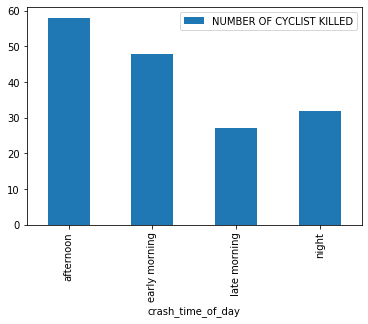

In [141]:
data[['NUMBER OF CYCLIST KILLED', 'crash_time_of_day']]\
.groupby(by=['crash_time_of_day']).agg(sum).sort_values(by='crash_time_of_day').plot(kind='bar')

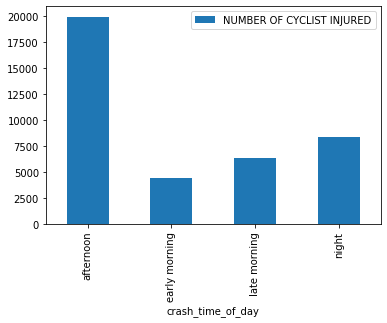

In [142]:
data[['NUMBER OF CYCLIST INJURED', 'crash_time_of_day']]\
.groupby(by=['crash_time_of_day']).agg(sum).sort_values(by='crash_time_of_day').plot(kind='bar')

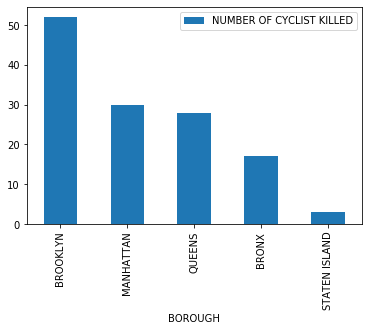

In [145]:
data[['NUMBER OF CYCLIST KILLED', 'BOROUGH']].groupby(by=['BOROUGH'])\
.agg(sum).sort_values(by='NUMBER OF CYCLIST KILLED', ascending=False).plot(kind='bar')

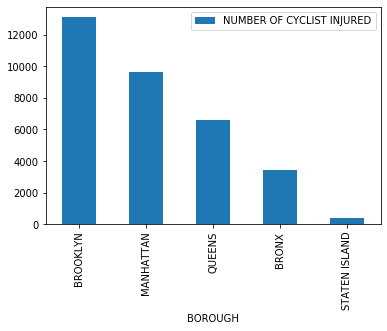

In [146]:
data[['NUMBER OF CYCLIST INJURED', 'BOROUGH']].groupby(by=['BOROUGH'])\
.agg(sum).sort_values(by='NUMBER OF CYCLIST INJURED', ascending=False).plot(kind='bar')

**Spatial-Temporal Visualizations**

In [175]:
pd.crosstab(data['BOROUGH'], data['crash_time_of_day'])

crash_time_of_day,afternoon,early morning,late morning,night
BOROUGH,,,,
BRONX,81510,26398,39240,24114
BROOKLYN,183099,51663,85027,53102
MANHATTAN,128248,41533,61604,42459
QUEENS,153412,46083,72820,44723
STATEN ISLAND,26388,6001,11124,6510


Look at breakdown of accidents where at least one sedan is involved

In [176]:
pd.crosstab(data['sedan_involved'], [df['BOROUGH'], df['crash_time_of_day']])

BOROUGH               BRONX                                    BROOKLYN  \
crash_time_of_day afternoon early morning late morning  night afternoon   
sedan_involved                                                            
0                     50892         15704        25320  14937    120630   
1                     27920          9747        12773   8407     58404   

BOROUGH                                             MANHATTAN                \
crash_time_of_day early morning late morning  night afternoon early morning   
sedan_involved                                                                
0                         31785        57774  33884     95663         29621   
1                         18599        25355  18107     28674         10637   

BOROUGH                                  QUEENS                             \
crash_time_of_day late morning  night afternoon early morning late morning   
sedan_involved                                                               
0                        46660  31141    100252         28282        49405   
1                        12751  10158     49830         16759        21718   

BOROUGH                  STATEN ISLAND                                   
crash_time_of_day  night     afternoon early morning late morning night  
sedan_involved                                                           
0                  28453         17429          3925         7666  4262  
1                  15368          8246          1927         3144  2091